# Train MNIST

In [29]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch
from torch.utils.data import DataLoader
import torchvision
import copy
plt.rcParams['figure.figsize'] = 15, 10

**Набор данных MNIST**

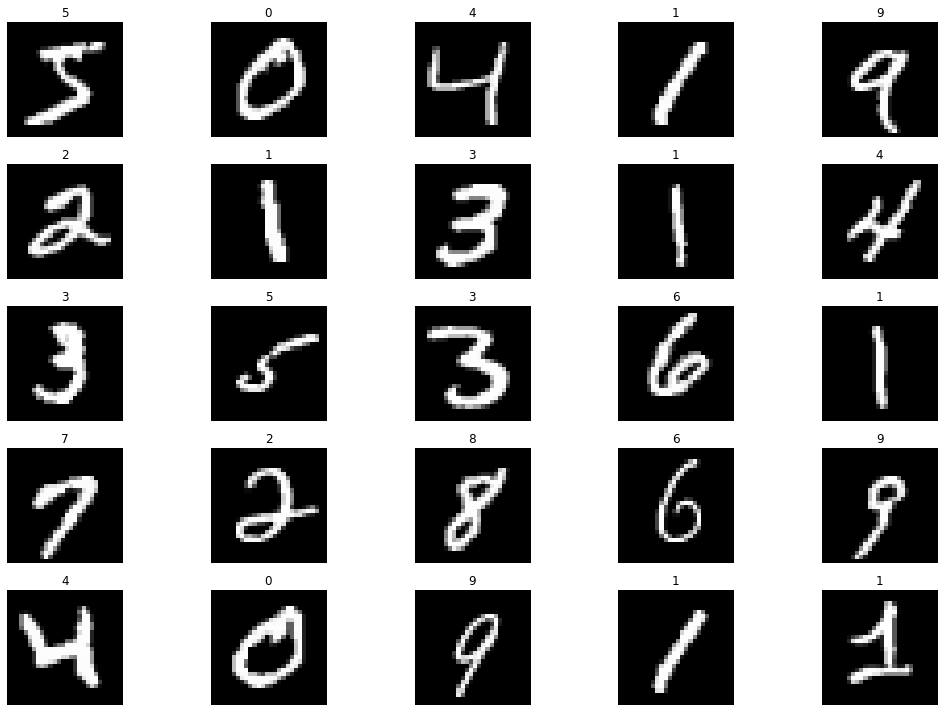

In [4]:
# Initializing the transform for the dataset
transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize((0.5), (0.5))
                                            ])

# Downloading the MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=torchvision.transforms.ToTensor(),
    download=False)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=torchvision.transforms.ToTensor(),
    download=False)


# Printing 25 random images from the training dataset
random_samples = np.random.randint(1, len(train_dataset), (25))

for idx in range(random_samples.shape[0]):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(train_dataset[idx][0][0].numpy(), cmap='gray')
    plt.title(train_dataset[idx][1])
    plt.axis('off')


plt.tight_layout()
plt.show()

Образцы рукописных цифр из набора данных MNIST, 

### Model

In [12]:
class FC(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 10)
        self.sigmoid = nn.Sigmoid()
                                
    def forward(self, x):
        x = self.sigmoid(self.fc1(x))
        return x

In [13]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)
dataloaders = {
    'train': train_loader,
    'test': test_loader
}

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [15]:
model = FC().to(device)
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-5
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Train without weights initialization

In [ ]:
epochs = 50

for epoch in range(epochs):
    print(f'epoch: {epoch + 1}')
    for phase in ['train', 'test']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        samples = 0
        loss_sum = []
        for imgs, labels in dataloaders[phase]:
            imgs, labels = imgs.to(device), labels.to(device)
            imgs = torch.reshape(imgs, (imgs.shape[0], 28*28))
            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                y = model(imgs)
                loss = criterion(y, labels)
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                loss_sum.append(loss.detach().cpu().numpy())
                samples += img.shape[0]
        for i in range(len(loss_sum)):
            loss_sum[i] = loss_sum[i].mean()
        res = sum(loss_sum) / len(loss_sum)
        print(f'{phase} loss: {res}')

last_model_wts = copy.deepcopy(model.state_dict())
torch.save(last_model_wts, "mnist_fc.pth")

In [30]:
last_model_wts = copy.deepcopy(model.state_dict())
torch.save(last_model_wts, "mnist_fc.pth")

### Test

In [209]:
PATH = 'mnist_fc.pth'
model = FC()
model.load_state_dict(torch.load(PATH))
model.to(device)
model.eval()

FC(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
  (sigmoid): Sigmoid()
)

### Visualization weights

In [214]:
w = model.fc1.weight
w.requires_grad = False
w = w.detach().cpu().numpy()

In [247]:
w_list = [w_i / w_i.max() for w_i in w]

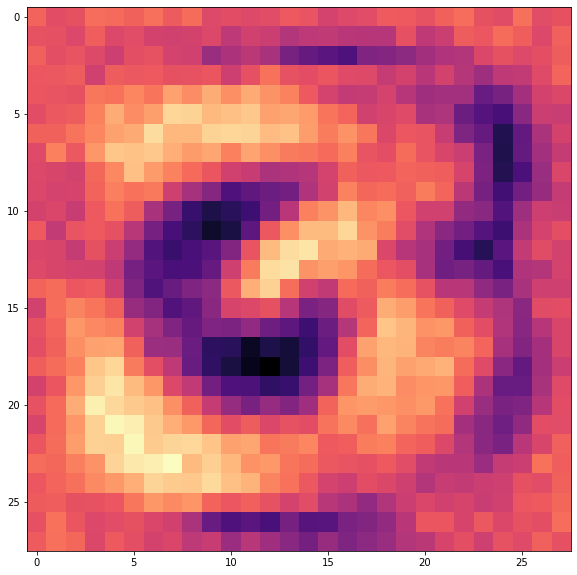

In [251]:
ind = 3
img = np.reshape(w_list[ind], (28,28))
img_np = img.copy()
plt.imshow(img_np, cmap='magma')
plt.show()

**Превратим данные в вектора**

In [252]:
def encode_label(j):
    # 5 -> [[0], [0], [0], [0], [0], [1], [0], [0], [0], [0]]
    e = np.zeros((10,1))
    e[j] = 1.0
    return e

def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784,1)) for x in data]
    labels = [encode_label(y[1]) for y in data]
    return zip(features, labels)

In [271]:
train = shape_data(train_dataset)

In [272]:
train = list(train)
print('train imgs -', len(train))

train imgs - 60000


In [257]:
def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)

In [265]:
avg_list = [average_digit(train, ind) for ind in range(10)]

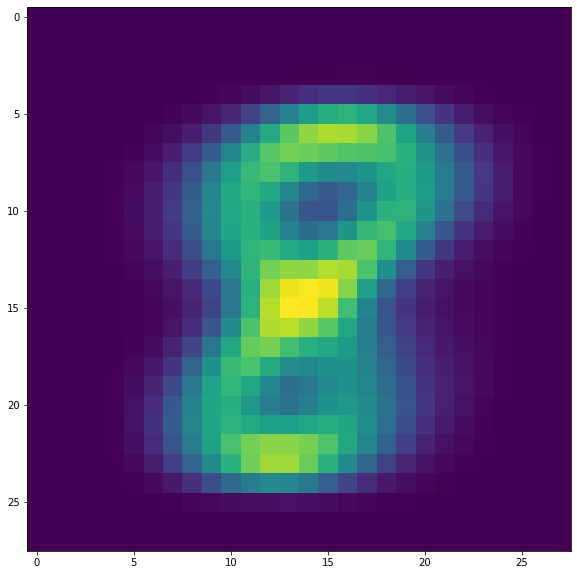

In [270]:
img = (np.reshape(avg_list[8], (28, 28)))
plt.imshow(img)
plt.show()

Это  среднее  представление  цифры  8 (avg_eight) из обучающего  набора  MNIST 
содержит большое количество информации о том, какими общими свойствами 
должны  обладать  изображения  восьмерки.  Мы  используем  avg_eight  в  качестве 
параметров простой модели, чтобы определить, является ли данный входной вектор x, представляющий цифру, изображением восьмерки. Когда речь идет о нейронных сетях, под параметрами, как правило, подразумеваются веса, и в данном 
случае avg_eight будет выступать именно в качестве веса.

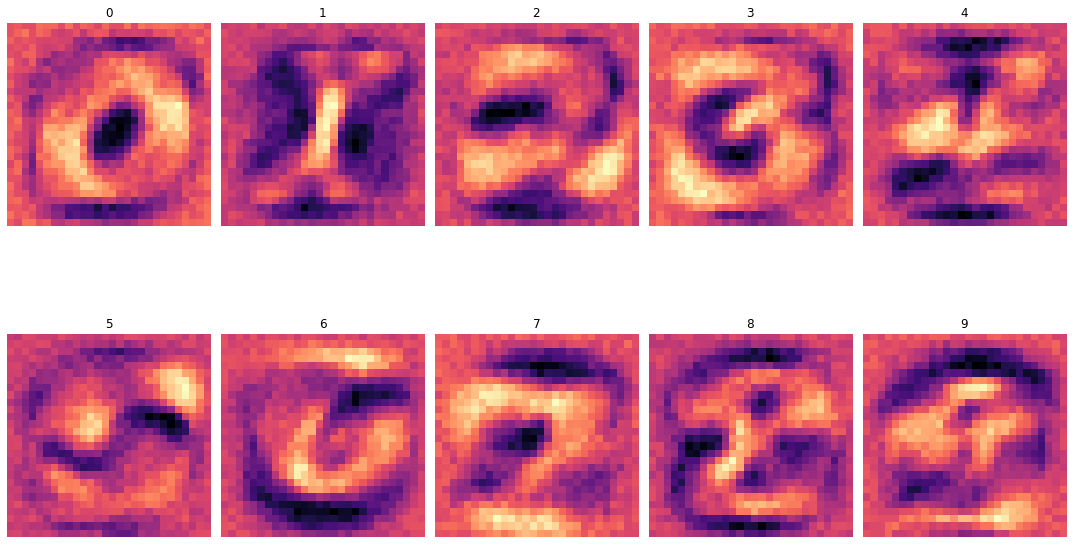

In [264]:
for idx in range(len(w_list)):
    plt.subplot(2, 5, idx + 1)
    img = np.reshape(w_list[idx], (28,28))
    plt.imshow(img, cmap='magma')
    plt.title(idx)
    plt.axis('off')


plt.tight_layout()
plt.show()

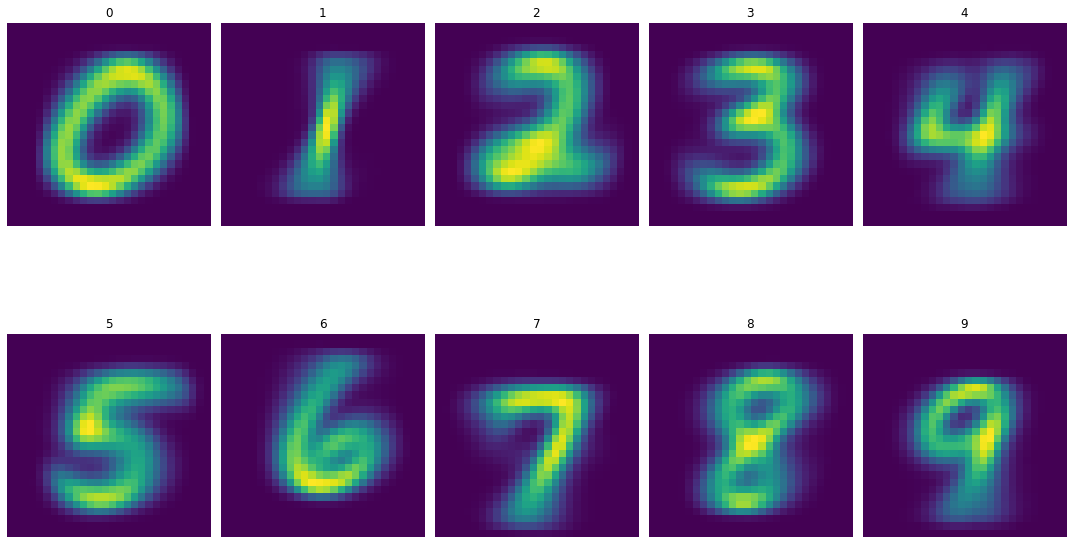

In [269]:
for idx in range(len(w_list)):
    plt.subplot(2, 5, idx + 1)
    img = np.reshape(avg_list[idx], (28,28))
    plt.imshow(img)
    plt.title(idx)
    plt.axis('off')


plt.tight_layout()
plt.show()